# Multiclass classification

Create a dataset with three classes, each class has N = 150 objects, represented by two variables X1 and X2 according to the following requirements (seed = 555):

The feature $X^1$ is distributed as follows:
- $X^1_1$ is a normal distribution with a mean of -3 and a standard deviation of 1.5
- $X^1_2$ is a normal distribution with a mean of 7 and a standard deviation of 3
- $X^1_3$ is a normal distribution with a mean of 2 and a standard deviation of 1

The feature $X^2$ is distributed as follows:
- $X^2_1$ is a normal distribution with a mean of 1 and a standard deviation of 3
- $X^2_2$ is a normal distribution with a mean of 3 and a standard deviation of 4
- $X^2_3$ is a normal distribution with a mean of -6 and a standard deviation of 5

Each class has its label $Y$ that can be $1$, $2$ or $3$

In [108]:
import numpy as np

# set seed
np.random.seed(555)

# number of samples
N = 150

# set class 1
X1_1 = np.random.normal(loc=-3, scale=1.5, size=N)
X1_2 = np.random.normal(loc=1, scale=3, size=N)

# set class 2
X2_1 = np.random.normal(loc=7, scale=3, size=N)
X2_2 = np.random.normal(loc=3, scale=4, size=N)

# set class 3
X3_1 = np.random.normal(loc=2, scale=1, size=N)
X3_2 = np.random.normal(loc=-6, scale=5, size=N)

# set labels
Y1 = np.ones(N)
Y2 = 2 * np.ones(N)
Y3 = 3 * np.ones(N)

Plot the generated dataset using the <tt>scatter</tt> function

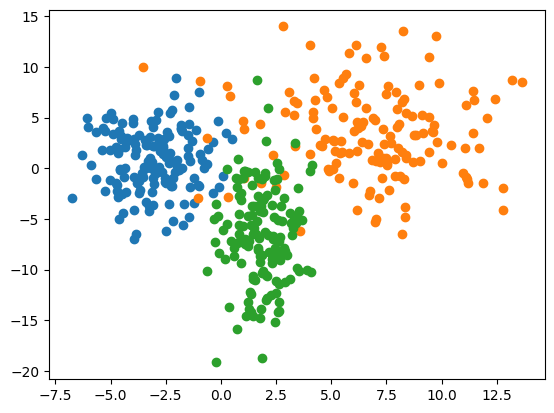

In [109]:
import matplotlib.pyplot as plt

# display class 1
plt.scatter(X1_1, X1_2)

# display class 2
plt.scatter(X2_1, X2_2)

# display class 3
plt.scatter(X3_1, X3_2)

Create a matrix of points $X$ (each row is an object) and a vector $Y$ of labels. Remember that we need the coordinate $X_0$ for the bias term (all ones).

In [110]:
# create bias vector
X0 = np.ones(3 * N)     # 3 = number of classes

# feature X1
X1 = np.concatenate((X1_1, X2_1, X3_1))

# feature X2
X2 = np.concatenate((X1_2, X2_2, X3_2))

# create dataset X
X = np.stack((X0, X1, X2), axis=1)

# create Y label vector
Y = np.concatenate((Y1, Y2, Y3))

We want to train a binary classifier for class 1. To this purpose, create a vector of labels <tt>y_class</tt> that contains 1 for each object belonging to the class under study (positive class) and -1 for all the other objects.

In [111]:
# this will be the positive label
chosen_label = 1

# define new vector of labels
y_class = np.zeros_like(Y) - 1

# set to 1 the chosen label
y_class[ Y == chosen_label ] = 1

Using <tt>plt.scatter</tt> plot the new binary classification problem

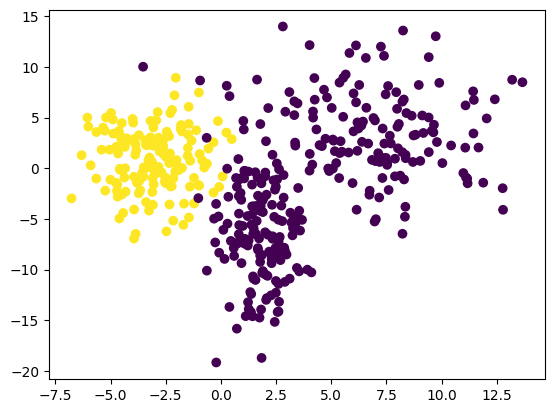

In [112]:
plt.scatter(X[:, 1], X[:, 2], c=y_class)

## Error function

Write the function <tt>sse(X, Y, w)</tt> that takes the data matrix $X$, the labels $Y$, and the vector of parameters $w$ and computes sum of squared errors defined as $\sum\left( Y - X\cdot w \right)^2$

In [113]:
def sse(X, Y, w):
    return np.sum(np.square(Y - np.dot(X, w)))

## Learning

After defining the vector of weights as a uniform distribution within the range \[-1. 1\], start training the model by using $\eta = 10^{-5}$ and the maximum epochs to 100. 

For each epoch save the sum of squared errors in the <tt>sse_epoch</tt> vector and the number of objects misclassified in the vector <tt>errors_epoch</tt>.


In [114]:
# error vector
w = np.random.uniform(-1, 1, X.shape[1])

# learning rate
eta = 1e-5

# epochs
max_epochs = 200
epoch = 0

# errors
sse_epoch = np.zeros(max_epochs)
errors_epoch = np.zeros(max_epochs)

# training
while epoch < max_epochs:

    # store sse of the current epoch
    sse_epoch[epoch] = sse(X, y_class, w)

    for i in range(1, y_class.size):
        # output of the perceptron of the i-th row
        output = np.sign(np.dot(X[i, :], w))

        # check errors
        if (y_class[i] * output < 0):
            w += eta * X[i, :] * y_class[i]
            errors_epoch[epoch] += 1
    
    epoch += 1


Display raw the plots containing the solution found by the PLA

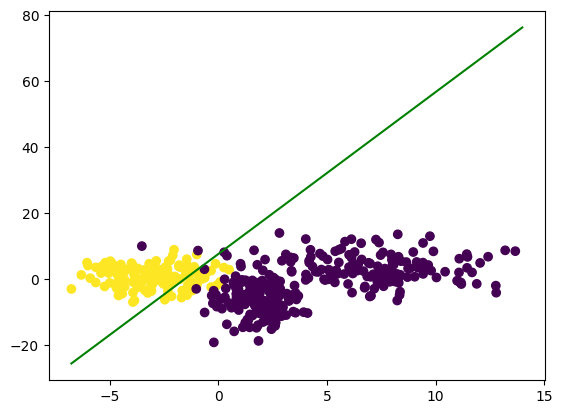

In [115]:
# plot datapoints
plt.scatter(X[:, 1], X[:, 2], c=y_class)

# plot the solution
plt.plot([ np.min((X1_1, X2_1, X3_1)), np.max((X1_2, X2_2, X3_2)) ],
         [ np.min((X1_1, X2_1, X3_1)) * (- w[1] / w[2]) + (w[0] / w[2]), np.max((X1_2, X2_2, X3_2)) * (- w[1] / w[2]) + (w[0] / w[2]) ],
         color = "green")

Now display the two error plots using the two error vectors

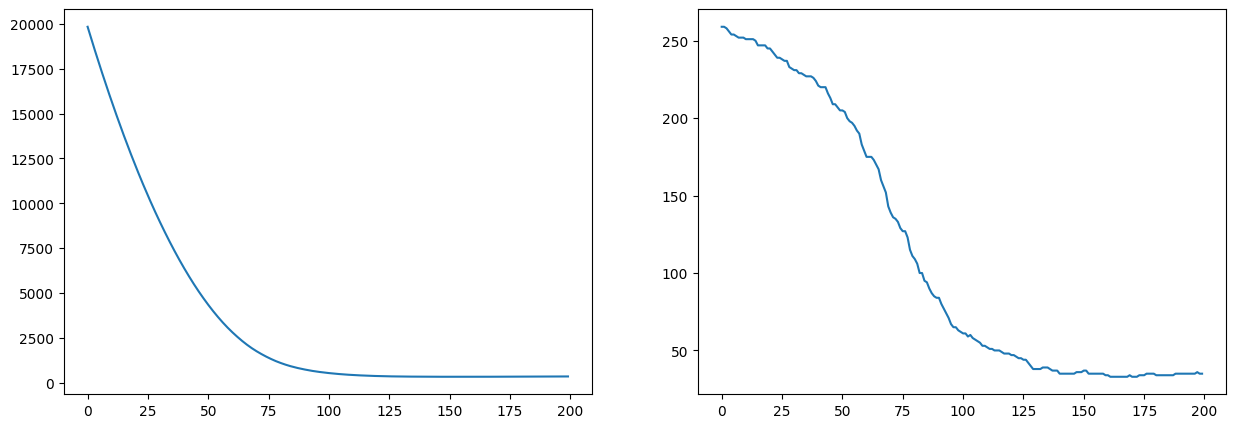

In [116]:
# create a subfigure
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# sum of squared errors
axs[0].plot(range(sse_epoch.size), sse_epoch)

# errors per epoch
axs[1].plot(range(errors_epoch.size), errors_epoch)